# Milestone 2 - Hypothesis Simulation 

## Author - Mike Pearson



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy as ss
import seaborn as sbn

auto_data = pd.read_csv(fileName)
print(auto_data.head())
print(auto_data.dtypes)


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

I will now clean up the price and turn it to an float64 object - and print out the classical summary for the price data.

In [3]:
##auto_data['price'] = auto_data['price'].replace('?', np.NaN)
auto_data['price']= auto_data['price'].replace(to_replace = "?", value = float("NaN"))
auto_data['price'] = pd.to_numeric(auto_data['price'], errors ='coerce')
price_out = np.isnan(auto_data['price'])
freemean = np.nanmean(auto_data['price'], axis = 0)
auto_data['price']= auto_data['price'].replace(to_replace = float("NaN"), value = freemean)
##print(freemean)
##print(auto_data.dtypes)
print(auto_data.loc[:,"price"].describe())


count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


## Using prior knowledge

From assignment 4, we learned that the price distribution is not normal, but is within a 10% confidence interval for log-normal.  

But I will duplicate that work here.


## First

I will take the log of the price and then normalize it.

And just for fun, I will compare the distribution to a log normal one.


max of the log price is  10.72326738402944
min of the log price  is  8.540519016719735
mean of the log price is  9.352815095562482
mean of normed log price is  1.971322833968571e-15
std of the normed log price is  0.22744619900127722
the 95% confidence interval is for the mean is  (-0.03139755439135819, 0.03139755439136213)
the 95% confidence interval is for the std is  (0.19604864460991706, 0.2588437533926374)


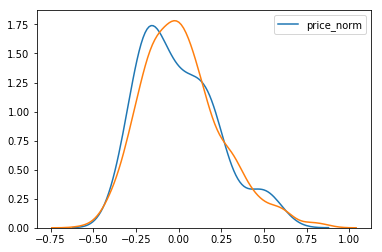

In [55]:
auto_data.loc[:,"log price"] = np.log(auto_data.loc[:,"price"])
maxy = np.max(auto_data.loc[:,"log price"])
print("max of the log price is ", maxy)
miny = np.min(auto_data.loc[:,"log price"])
print("min of the log price  is ", miny)
meany = np.mean(auto_data.loc[:,"log price"])
print("mean of the log price is ", meany)
auto_data.loc[:,"price_norm"] = (auto_data.loc[:,"log price"] - meany) / (maxy - miny)
meen = np.mean(auto_data.loc[:,"price_norm"])
print("mean of normed log price is ", meen)
standy = np.std(auto_data.loc[:,"price_norm"])
print("std of the normed log price is ", standy)

##
sbn.kdeplot(auto_data.loc[:,"price_norm"])
sbn.kdeplot(np.random.lognormal(meen,standy,1000)-1)


print("the 95% confidence interval is for the mean is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.mean(auto_data.loc[:,"price_norm"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"price_norm"])))

print("the 95% confidence interval is for the std is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.std(auto_data.loc[:,"price_norm"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"price_norm"])))

## Q-Q plot

Here's aQ-Q plot of the logged and normed price data

Text(0.5, 1.0, 'Q-Q plot of Normal distribution versus normed log of  Price distribution')

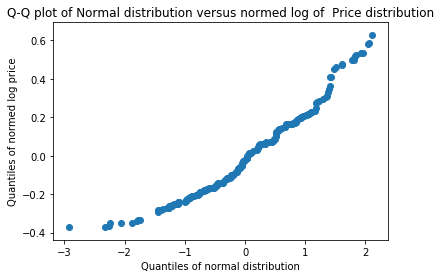

In [34]:
norm1 = nr.normal(size = len(auto_data)).tolist()
log_price = auto_data.loc[:,"price_norm"]
log_price_norm = (log_price - log_price.mean()) / (log_price.max() - log_price.min())
plt.scatter(x = sorted(norm1), y = sorted(log_price_norm))
plt.xlabel('Quantiles of normal distribution')
plt.ylabel('Quantiles of normed log price')
plt.title('Q-Q plot of Normal distribution versus normed log of  Price distribution')


## P-value and K stat test

the mean of the normed log price is  2.5453893735308468e-17
the standard deviation of the normed log price is  0.18172615702782277
KstestResult(statistic=0.09800060861816506, pvalue=0.03636341650046959)


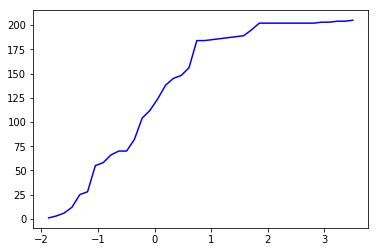

In [67]:
from sklearn.preprocessing import scale
%matplotlib inline

norm2_s = nr.normal(size = len(log_price)).tolist()
log_price_norm_s = scale(log_price_norm)

values, base = np.histogram(scale(log_price_norm), bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
 
print("the mean of the normed log price is ", log_price_norm.mean())
print("the standard deviation of the normed log price is ",log_price_norm.std())
print(ss.stats.kstest(log_price_norm_s, 'norm'))

## So I will go with a log-normal distribution and work with the log of the normed price

## Two sample distributions of normed price - turbo versus standard aspiration

I will separate the log of the price into the price for cars with turbo aspiration and cars with standard aspiration


the log standard aspiration info is 
 count    168.000000
mean      -0.027183
std        0.230003
min       -0.372144
25%       -0.200385
50%       -0.084267
75%        0.129995
max        0.627856
Name: log std price, dtype: float64
the log turbo aspiration info is 
 count    37.000000
mean      0.123424
std       0.173423
min      -0.185669
25%       0.006421
50%       0.116467
75%       0.227577
max       0.461848
Name: log turbo price, dtype: float64


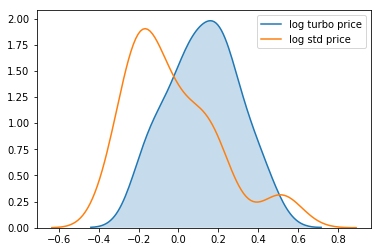

In [5]:
auto_data.loc[:,"std"] = auto_data.loc[:,"aspiration"].isin(['std']).astype(int)
auto_data.loc[:,"turbo"] = auto_data.loc[:,"aspiration"].isin(['turbo']).astype(int)
auto_std = auto_data.query('std == 1')
auto_turbo = auto_data.query('turbo == 1')
auto_std.columns = auto_std.columns.str.replace('price_norm','log std price')
auto_turbo.columns = auto_turbo.columns.str.replace('price_norm','log turbo price')
sbn.kdeplot( auto_turbo.loc[:,"log turbo price"], shade = True )
sbn.kdeplot( auto_std.loc[:,"log std price"] )
print("the log standard aspiration info is \n", auto_std.loc[:,"log std price"].describe())
print("the log turbo aspiration info is \n", auto_turbo.loc[:,"log turbo price"].describe())

## Bootstrap comparison between the means of the log-price of the turbo cars and the standard cars.

I will now use bootstrap methods to get the mean and standard deviation of the normalized log of the price. I will resample 10,000 times.

## Milestone criteria

The confidence intervals for the mean are below

The mean of the bootstrapped sampling for turbo aspiration is  0.12355356653559604
The 95% confidence interval for the turbo aspiration is from  -0.17154240435006382 to  0.4156119421866927
The mean of the bootstrapped sampling for standard aspiration is  -0.027351133647686657
The 95% confidence interval for the standard aspiration is from  -0.3483569404366704 to  0.5306994012301735


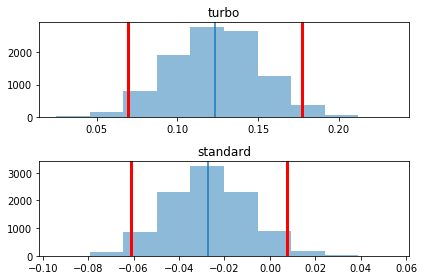

In [35]:

n_replicas = 10000

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    


auto_std.columns = auto_std.columns.str.replace('log std price','log_std_price')
auto_turbo.columns = auto_turbo.columns.str.replace('log turbo price','log_turbo_price')
##
turbo_log_price = auto_turbo.loc[:,"log_turbo_price"]
turbo_log_price_bootstrap_means = pd.Series([
    turbo_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

std_log_price = auto_std.loc[:,"log_std_price"]
std_log_price_bootstrap_means = pd.Series([
    std_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
##
plot_dists(turbo_log_price_bootstrap_means, std_log_price_bootstrap_means, 
           nbins=80, a_label='turbo', b_label='standard')
p = 5
print("The mean of the bootstrapped sampling for turbo aspiration is " , np.mean(turbo_log_price_bootstrap_means)) 
print("The 95% confidence interval for the turbo aspiration is from ", np.percentile(turbo_log_price, p/2.), "to ", np.percentile(turbo_log_price, 100-p/2.))
print("The mean of the bootstrapped sampling for standard aspiration is " , np.mean(std_log_price_bootstrap_means))
print("The 95% confidence interval for the standard aspiration is from ", np.percentile(std_log_price, p/2.), "to ", np.percentile(std_log_price, 100-p/2.))

## Confidence interval for standard deviations

The mean of the std of the bootstrapped sampling for turbo aspiration is  0.17025694575043163
The 95% confidence interval for the turbo aspiration is from  0.13775117475508047 to  0.2008542028003935
The mean of the std of the bootstrapped sampling for standard aspiration is  0.22892563137886968
The 95% confidence interval for the standard aspiration is from  0.20230065285317314 to  0.25525640535370464


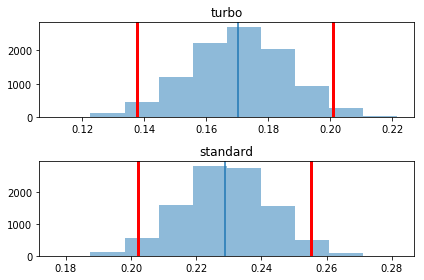

In [40]:
turbo_log_price = auto_turbo.loc[:,"log_turbo_price"]
turbo_log_price_bootstrap_stds = pd.Series([
    turbo_log_price.sample(frac=1, replace=True).std()
    for i in range(n_replicas)])

std_log_price = auto_std.loc[:,"log_std_price"]
std_log_price_bootstrap_stds = pd.Series([
    std_log_price.sample(frac=1, replace=True).std()
    for i in range(n_replicas)])
##
plot_dists(turbo_log_price_bootstrap_stds, std_log_price_bootstrap_stds, 
           nbins=80, a_label='turbo', b_label='standard')

print("The mean of the std of the bootstrapped sampling for turbo aspiration is " , np.mean(turbo_log_price_bootstrap_stds)) 
print("The 95% confidence interval for the turbo aspiration is from ", np.percentile(turbo_log_price_bootstrap_stds, p/2.), "to ", np.percentile(turbo_log_price_bootstrap_stds, 100-p/2.))
print("The mean of the std of the bootstrapped sampling for standard aspiration is " , np.mean(std_log_price_bootstrap_stds))
print("The 95% confidence interval for the standard aspiration is from ", np.percentile(std_log_price_bootstrap_stds, p/2.), "to ", np.percentile(std_log_price_bootstrap_stds, 100-p/2.))

## Bayesian statistics

I will use Bayesian statistics to determine the mean and standard deviation of the log price of the standard aspiration and the turbo aspiration

Mean = 0.000, Standard deviation = 0.227
Mean = -0.027, Standard deviation = 0.229


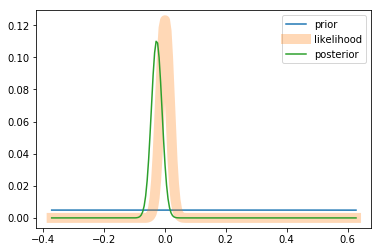

In [66]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

N = len(auto_data)
p = np.linspace(np.min(auto_data.loc[:,"price_norm"]), np.max(auto_data.loc[:,"price_norm"]), num=N)

std_mean = np.mean(auto_std.loc[:,"log_std_price"])
pp = ss.stats.norm.pdf(p, std_mean, scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

all_log_prices = comp_like(p, auto_data.loc[:,"price_norm"])
std_log_prices = comp_like(p, auto_std.loc[:,"log_std_price"])

plt.plot(p, pp, label='prior')
plt.plot(p, all_log_prices, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, std_log_prices, label='posterior')
plt.legend()

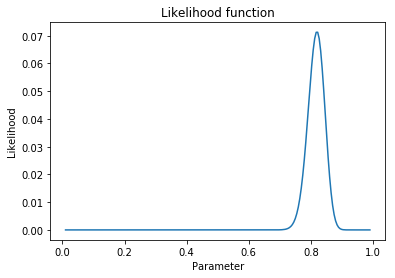

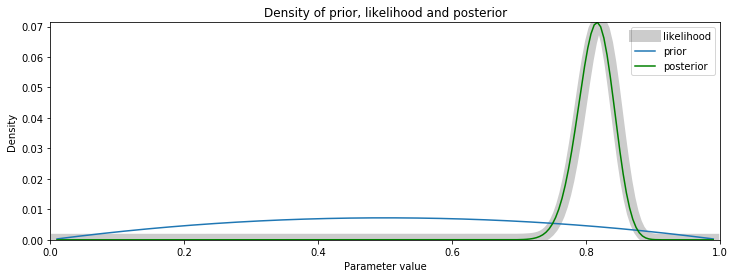

In [74]:
## The probability that a car is standard aspiration
num_std_cars = len(auto_std)
num_turbo_cars = len(auto_turbo)

prob = num_std_cars/(num_turbo_cars + num_std_cars)

##def likelihood(p, data):


stddog = auto_data.loc[:,"std"].astype(np.int64)


p = np.linspace(.01, .99, num=N)
pp = [1./N] * N
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = ss.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, stddog)
plt.plot(p, l)
plt.title('Likelihood function')
plt.xlabel('Parameter')
plt.ylabel('Likelihood')

def beta_prior(x, a, b):
    l = ss.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    plt.figure(figsize=(12, 4))
    plt.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    plt.plot(x, prior, label='prior')
    plt.plot(x, post, label='posterior', color='green')
    plt.ylim(0, maxy)
    plt.xlim(0, 1)
    plt.title('Density of prior, likelihood and posterior')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.legend()
    
pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

## Finding dependencies

Let's see if we can find some dependencies that will help us find the distributions within the distribution

In [178]:
auto_aspiration = auto_data.groupby('drive-wheels')
auto_aspy = pd.DataFrame({'count': auto_aspiration.size(), 
                       'mean': auto_aspiration.aggregate(np.mean).loc[:, 'price_norm']})
print(auto_aspy.head())


              count      mean
drive-wheels                 
4wd               9 -0.056705
fwd             120 -0.122935
rwd              76  0.200822


the rear wheel drive info is 
 count    76.000000
mean      0.200822
std       0.199872
min      -0.242971
25%       0.067534
50%       0.174378
75%       0.306421
max       0.627856
Name: log rwd price, dtype: float64
the front wheel drive info is 
 count    120.000000
mean      -0.122935
std        0.146956
min       -0.372144
25%       -0.230239
50%       -0.154966
75%       -0.037686
max        0.333420
Name: log fwd price, dtype: float64
the four wheel drive info is 
 count    9.000000
mean    -0.056705
std      0.128153
min     -0.190822
25%     -0.166760
50%     -0.101833
75%      0.006421
max      0.189797
Name: log fourwd price, dtype: float64


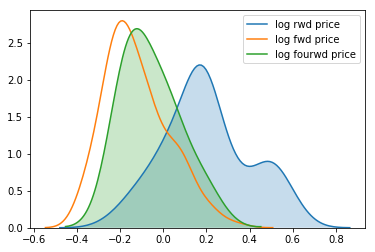

In [179]:
auto_data.loc[:,"rwd"] = auto_data.loc[:,"drive-wheels"].isin(['rwd']).astype(int)
auto_data.loc[:,"fwd"] = auto_data.loc[:,"drive-wheels"].isin(['fwd']).astype(int)
auto_data.loc[:,"fourwd"] = auto_data.loc[:,"drive-wheels"].isin(['4wd']).astype(int)
auto_rwd = auto_data.query('rwd == 1')
auto_rwd.columns = auto_rwd.columns.str.replace('price_norm','log rwd price')
auto_fwd = auto_data.query('fwd == 1')
auto_fwd.columns = auto_fwd.columns.str.replace('price_norm','log fwd price')
auto_4wd = auto_data.query('fourwd == 1')
auto_4wd.columns = auto_4wd.columns.str.replace('price_norm','log fourwd price')
sbn.kdeplot( auto_rwd.loc[:,"log rwd price"] , shade = True)
sbn.kdeplot( auto_fwd.loc[:,"log fwd price"], shade = False)
sbn.kdeplot( auto_4wd.loc[:,"log fourwd price"], shade = True)
print("the rear wheel drive info is \n", auto_rwd.loc[:,"log rwd price"].describe())
print("the front wheel drive info is \n", auto_fwd.loc[:,"log fwd price"].describe())
print("the four wheel drive info is \n", auto_4wd.loc[:,"log fourwd price"].describe())

the log standard aspiration info is 
 count    168.000000
mean      -0.027183
std        0.230003
min       -0.372144
25%       -0.200385
50%       -0.084267
75%        0.129995
max        0.627856
Name: log std price, dtype: float64
the log turbo aspiration info is 
 count    37.000000
mean      0.123424
std       0.173423
min      -0.185669
25%       0.006421
50%       0.116467
75%       0.227577
max       0.461848
Name: log turbo price, dtype: float64


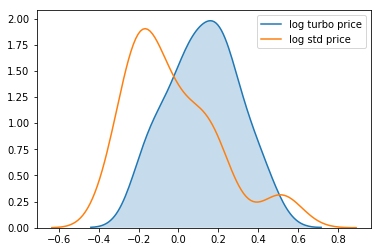

In [180]:
auto_data.loc[:,"std"] = auto_data.loc[:,"aspiration"].isin(['std']).astype(int)
auto_data.loc[:,"turbo"] = auto_data.loc[:,"aspiration"].isin(['turbo']).astype(int)
auto_std = auto_data.query('std == 1')
auto_turbo = auto_data.query('turbo == 1')
auto_std.columns = auto_std.columns.str.replace('price_norm','log std price')
auto_turbo.columns = auto_turbo.columns.str.replace('price_norm','log turbo price')
sbn.kdeplot( auto_turbo.loc[:,"log turbo price"], shade = True )
sbn.kdeplot( auto_std.loc[:,"log std price"] )
print("the log standard aspiration info is \n", auto_std.loc[:,"log std price"].describe())
print("the log turbo aspiration info is \n", auto_turbo.loc[:,"log turbo price"].describe())

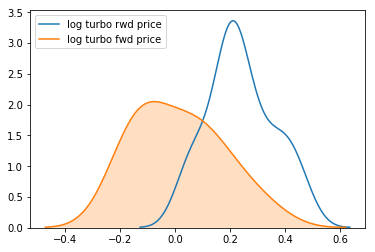

In [181]:
auto_std_rwd = auto_data.query('std == 1')
auto_std_rwd = auto_std_rwd.query('rwd == 1')
##
auto_std_fwd = auto_data.query('std == 1')
auto_std_fwd = auto_std_fwd.query('fwd == 1')
##
auto_std_fourwd = auto_data.query('std == 1')
auto_std_fourwd = auto_std_fourwd.query('fourwd == 1')
##
auto_turbo_rwd = auto_data.query('turbo == 1')
auto_turbo_rwd = auto_turbo_rwd.query('rwd == 1')
##
auto_turbo_fwd = auto_data.query('turbo == 1')
auto_turbo_fwd = auto_turbo_fwd.query('fwd == 1')
##
auto_turbo_fourwd = auto_data.query('turbo == 1')
auto_turbo_fourwd = auto_turbo_fwd.query('fourwd == 1')
##
auto_std_rwd.columns = auto_std_rwd.columns.str.replace('price_norm','log std rwd price')
auto_std_fwd.columns = auto_std_fwd.columns.str.replace('price_norm','log std fwd price')
auto_std_fourwd.columns = auto_std_fourwd.columns.str.replace('price_norm','log std 4wd price')
## 

auto_turbo_fwd.columns = auto_turbo_fwd.columns.str.replace('price_norm','log turbo fwd price')
auto_turbo_rwd.columns = auto_turbo_rwd.columns.str.replace('price_norm','log turbo rwd price')
##auto_turbo_fourwd.columns = auto_turbo_fourwd.columns.str.replace('price','turbo 4wd price')
## There are no four wheel drive turbo vehicles. What an outrage!


sbn.kdeplot(auto_turbo_rwd.loc[:,"log turbo rwd price"] )
sbn.kdeplot(auto_turbo_fwd.loc[:,"log turbo fwd price"], shade = True )
##sbn.kdeplot(auto_turbo_fourwd.loc[:,"turbo 4wd price"], shade = True)

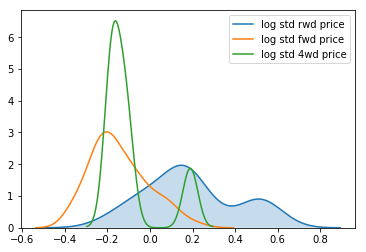

In [182]:
sbn.kdeplot( auto_std_rwd.loc[:,"log std rwd price"] , shade = True)
sbn.kdeplot( auto_std_fwd.loc[:,"log std fwd price"])
sbn.kdeplot(auto_std_fourwd.loc[:,"log std 4wd price"])

In [183]:
print("the standard rear wheel drive info is \n", auto_std_rwd.loc[:,"log std rwd price"].describe())
print("the standard front wheel drive info is \n",auto_std_fwd.loc[:,"log std fwd price"].describe())
print("the standard four wheel drive info is \n",auto_std_fourwd.loc[:,"log std 4wd price"].describe())
print("the turbo rear wheel drive info is \n",auto_turbo_rwd.loc[:,"log turbo rwd price"].describe())
print("the turbo front wheel drive info is \n",auto_turbo_fwd.loc[:,"log turbo fwd price"].describe())
##print("the turbo four wheel drive info is \n", auto_turbo_fourwd.loc[:,"turbo 4wd price"].describe())

the standard rear wheel drive info is 
 count    58.000000
mean      0.189002
std       0.218454
min      -0.242971
25%       0.039266
50%       0.164359
75%       0.293517
max       0.627856
Name: log std rwd price, dtype: float64
the standard front wheel drive info is 
 count    104.000000
mean      -0.143854
std        0.134315
min       -0.372144
25%       -0.239577
50%       -0.171160
75%       -0.063199
max        0.226852
Name: log std fwd price, dtype: float64
the standard four wheel drive info is 
 count    6.000000
mean    -0.094664
std      0.143199
min     -0.190822
25%     -0.171727
50%     -0.145872
75%     -0.107621
max      0.189797
Name: log std 4wd price, dtype: float64
the turbo rear wheel drive info is 
 count    18.000000
mean      0.238912
std       0.119258
min       0.046533
25%       0.176305
50%       0.221079
75%       0.307996
max       0.461848
Name: log turbo rwd price, dtype: float64
the turbo front wheel drive info is 
 count    16.000000
mean      0.013

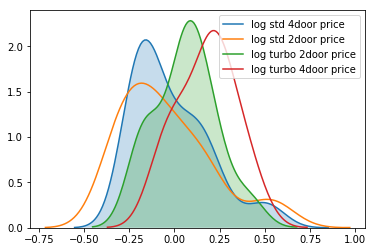

In [184]:
auto_data.loc[:,"twodoor"] = auto_data.loc[:,"num-of-doors"].isin(['two']).astype(int)
auto_data.loc[:,"fourdoor"] = auto_data.loc[:,"num-of-doors"].isin(['four']).astype(int)
##
auto_std_4d = auto_data.query('std == 1')
auto_std_4d = auto_std_4d.query('fourdoor == 1')
auto_std_4d.columns = auto_std_4d.columns.str.replace('price_norm','log std 4door price')
##
auto_std_2d = auto_data.query('std == 1')
auto_std_2d = auto_std_2d.query('twodoor == 1')
auto_std_2d.columns = auto_std_2d.columns.str.replace('price_norm','log std 2door price')
##
auto_turbo_2d = auto_data.query('turbo == 1')
auto_turbo_2d = auto_turbo_2d.query('twodoor == 1')
auto_turbo_2d.columns = auto_turbo_2d.columns.str.replace('price_norm','log turbo 2door price')
##
auto_turbo_4d = auto_data.query('turbo == 1')
auto_turbo_4d = auto_turbo_4d.query('fourdoor == 1')  
auto_turbo_4d.columns = auto_turbo_4d.columns.str.replace('price_norm','log turbo 4door price')


##
sbn.kdeplot(auto_std_4d.loc[:,"log std 4door price"] , shade = True)
sbn.kdeplot(auto_std_2d.loc[:,"log std 2door price"] )
sbn.kdeplot(auto_turbo_2d.loc[:,"log turbo 2door price"] , shade = True)
sbn.kdeplot(auto_turbo_4d.loc[:,"log turbo 4door price"], cbar = True )

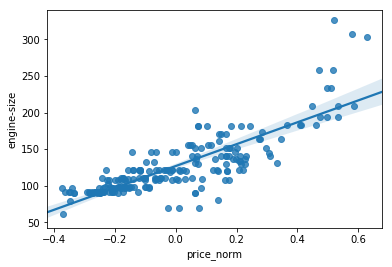

In [151]:
sbn.regplot(auto_data.loc[:,"price_norm"], auto_data.loc[:,"engine-size"])

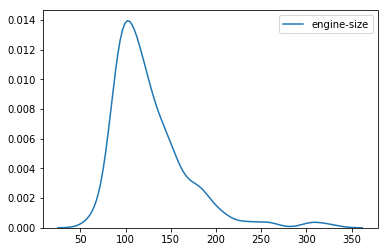

In [81]:
sbn.kdeplot(auto_data.loc[:,"engine-size"])

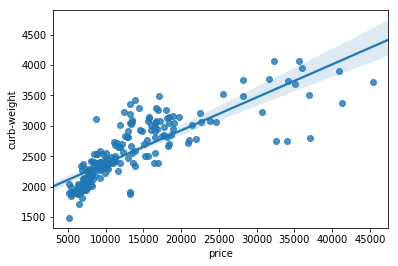

In [76]:
sbn.regplot(auto_data.loc[:,"price"], auto_data.loc[:,"curb-weight"])

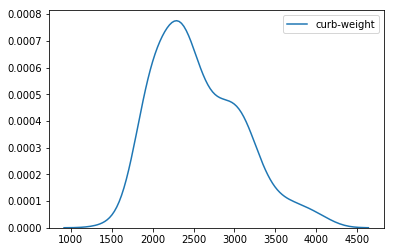

In [83]:
sbn.kdeplot(auto_data.loc[:,"curb-weight"])

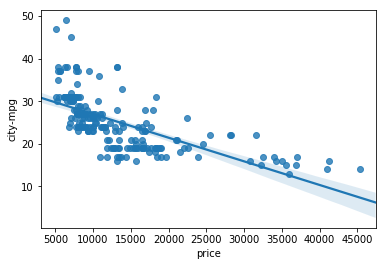

In [77]:
sbn.regplot(auto_data.loc[:,"price"], auto_data.loc[:,"city-mpg"])

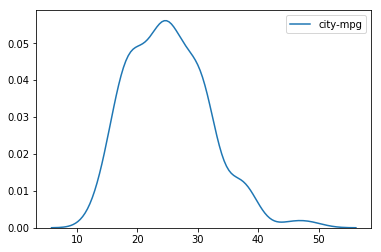

In [84]:
sbn.kdeplot(auto_data.loc[:,"city-mpg"])

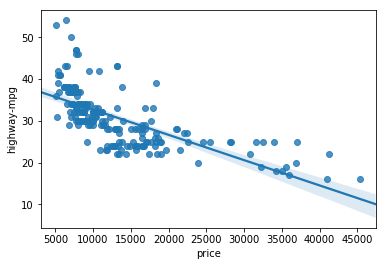

In [79]:
sbn.regplot(auto_data.loc[:,"price"], auto_data.loc[:,"highway-mpg"])

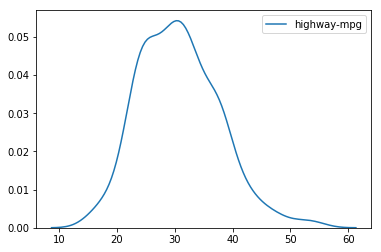

In [85]:
sbn.kdeplot(auto_data.loc[:,"highway-mpg"])

In [86]:
auto_data.loc[:,"log price"] = np.log(auto_data.loc[:,"price"])

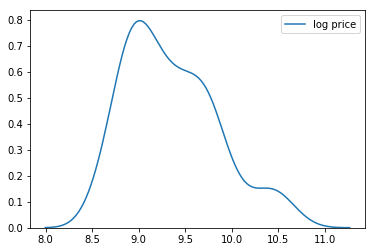

In [87]:
sbn.kdeplot(auto_data.loc[:,"log price"])

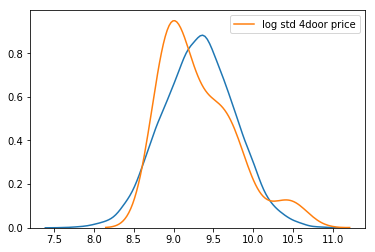

In [114]:
auto_std_4d.loc[:,"log std 4door price"] = np.log(auto_std_4d.loc[:,"std 4door price"])
fix = np.mean(auto_std_4d.loc[:,"log std 4door price"])
flux = np.std(auto_std_4d.loc[:,"log std 4door price"])
flax = np.random.normal(fix, flux, 10000)
sbn.kdeplot(flax)
sbn.kdeplot(auto_std_4d.loc[:,"log std 4door price"] )

Some Bootstrapping fun.

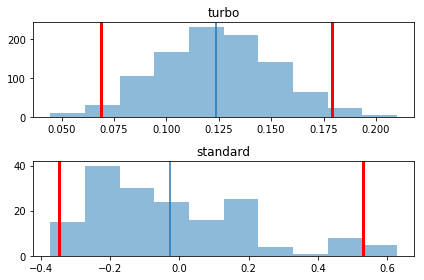

In [190]:
n_replicas = 1000
    
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    


auto_std.columns = auto_std.columns.str.replace('log std price','log_std_price')
auto_turbo.columns = auto_turbo.columns.str.replace('log turbo price','log_turbo_price')

turbo_log_price = auto_turbo.loc[:,"log_turbo_price"]
turbo_log_price_bootstrap_means = pd.Series([
    turbo_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

std_log_price = auto_std.loc[:,"log_std_price"]
std_log_price_bootstrap_means = pd.Series([
    std_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])



#Replace the ???
plot_dists(turbo_log_price_bootstrap_means, std_log_price, 
           nbins=80, a_label='turbo', b_label='standard')

In [64]:
##from numpy import sum, mean, size, sqrt
##from scipy.stats import norm, invgamma

def draw_mus_and_sigmas(data,m0,k0,s_sq0,v0,n_samples=10000):
    # number of samples
    N = size(data)
    # find the mean of the data
    the_mean = mean(data) 
    # sum of squared differences between data and mean
    SSD = sum( (data - the_mean)**2 ) 

    # combining the prior with the data - page 79 of Gelman et al.
    # to make sense of this note that 
    # inv-chi-sq(v,s^2) = inv-gamma(v/2,(v*s^2)/2)
    kN = float(k0 + N)
    mN = (k0/kN)*m0 + (N/kN)*the_mean
    vN = v0 + N
    vN_times_s_sqN = v0*s_sq0 + SSD + (N*k0*(m0-the_mean)**2)/kN

    # 1) draw the variances from an inverse gamma 
    # (params: alpha, beta)
    alpha = vN/2
    beta = vN_times_s_sqN/2
    # thanks to wikipedia, we know that:
    # if X ~ inv-gamma(a,1) then b*X ~ inv-gamma(a,b)
    sig_sq_samples = beta*invgamma.rvs(alpha,size=n_samples)

    # 2) draw means from a normal conditioned on the drawn sigmas
    # (params: mean_norm, var_norm)
    mean_norm = mN
    var_norm = np.sqrt(sig_sq_samples)/kN
    mu_samples = norm.rvs(mean_norm,scale=var_norm,size=n_samples)

    # 3) return the mu_samples and sig_sq_samples
    return mu_samples, sig_sq_samples

data = auto_std.loc[:,"log_std_price"]


##from numpy.random import normal

# step 1: define prior parameters for the normal and inverse gamma
m0 = 4. 
k0 = 1.  
s_sq0 = 1. 
v0 = 1. 

# step 2: get some random data, with slightly different statistics
A_data = np.random.normal(loc=4.1, scale=0.9, size=500)
B_data = np.random.normal(loc=4.0, scale=1.0, size=500) 

# step 3: get posterior samples
A_mus,A_sig_sqs = draw_mus_and_sigmas(A_data,m0,k0,s_sq0,v0)
B_mus,B_sig_sqs = draw_mus_and_sigmas(B_data,m0,k0,s_sq0,v0)

# step 4: perform numerical integration
# probability that mean of A is greater than mean of B:
print( mean(A_mus > B_mus) )
# probability that variance of A is greater than variance of B:
print(mean(A_sig_sqs > B_sig_sqs))

tryit = draw_mus_and_sigmas(data,m0,k0,s_sq0,v0,n_samples=10000)

1.0
0.1285


## Other stats - city mpg

Let's look at the distribution of city-mpg and get the classical stats


count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64
the 95% confidence interval is for the mean is  (24.318615000378962, 26.12040938986494)
the 95% confidence interval is for the std is  (5.625268508519275, 7.427062898005252)


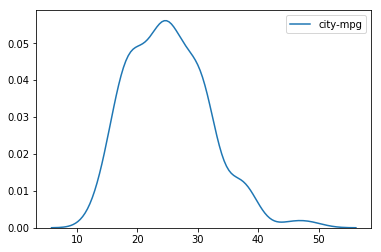

In [57]:
sbn.kdeplot(auto_data.loc[:,"city-mpg"])
print(auto_data.loc[:,"city-mpg"].describe())

print("the 95% confidence interval is for the mean is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.mean(auto_data.loc[:,"city-mpg"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"city-mpg"])))

print("the 95% confidence interval is for the std is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.std(auto_data.loc[:,"city-mpg"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"city-mpg"])))


## What distribution - normal?

Let's do a Q-Q plot versus a normal distribution 

the 95% confidence interval is for the mean is  (-0.03139755439135819, 0.03139755439136213)
the 95% confidence interval is for the std is  (0.19604864460991706, 0.2588437533926374)


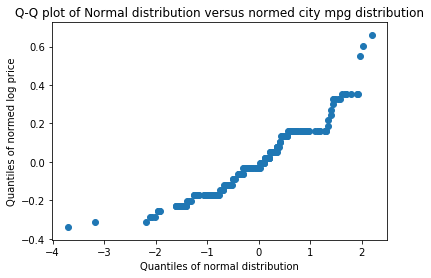

In [58]:
norm1 = nr.normal(size = len(auto_data)).tolist()
city_mpg = auto_data.loc[:,"city-mpg"]
city_mpg_norm = (city_mpg - city_mpg.mean()) / (city_mpg.max() - city_mpg.min())
plt.scatter(x = sorted(norm1), y = sorted(city_mpg_norm))
plt.xlabel('Quantiles of normal distribution')
plt.ylabel('Quantiles of normed log price')
plt.title('Q-Q plot of Normal distribution versus normed city mpg distribution')


print("the 95% confidence interval is for the mean is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.mean(auto_data.loc[:,"price_norm"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"price_norm"])))

print("the 95% confidence interval is for the std is ", 
      ss.stats.t.interval(0.95, len(auto_data)-1, loc=np.std(auto_data.loc[:,"price_norm"]), 
                          scale=ss.stats.sem(auto_data.loc[:,"price_norm"])))

## Let's check the p-value and k stat



the mean of the normed city mpg is  2.5453893735308468e-17
the standard deviation of the normed city mpg is  0.18172615702782277
KstestResult(statistic=0.3736188117524132, pvalue=0.0)


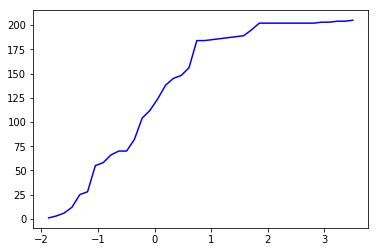

In [68]:
##from sklearn.preprocessing import scale
##%matplotlib inline

norm2_s = nr.normal(size = len(city_mpg)).tolist()
city_mpg_norm_s = scale(city_mpg_norm)
values, base = np.histogram(scale(city_mpg_norm_s), bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)

plt.plot(base[:-1], cumulative, c='blue')
##plot_cums(norm2_s, log_price_norm_s) 
print("the mean of the normed city mpg is ", log_price_norm.mean())
print("the standard deviation of the normed city mpg is ",log_price_norm.std())
print(ss.stats.kstest(city_mpg_norm, 'norm'))

## City Mpg is normal distribution

With a p-value of 0, we can treat this as a normal distribution

## Bootstrapping

Let's do some bootstrapping on the citympg data - turbo versus standard

The mean of the bootstrapped sampling for turbo aspiration is  0.12355356653559604
The 95% confidence interval for the turbo aspiration is from  -0.17154240435006382 to  0.4156119421866927
The mean of the bootstrapped sampling for standard aspiration is  -0.027351133647686657
The 95% confidence interval for the standard aspiration is from  -0.3483569404366704 to  0.5306994012301735


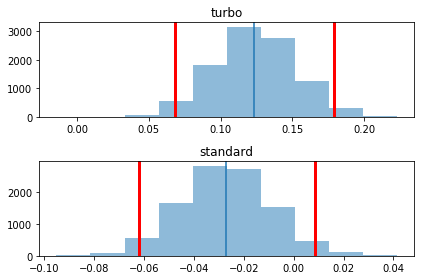

In [60]:

##
turbo_city_mpg = auto_turbo.loc[:,"city-mpg"]
turbo_city_mpg_bootstrap_means = pd.Series([
    turbo_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

std_city_mpg = auto_std.loc[:,"city-mpg"]
std_city_mpg_bootstrap_means = pd.Series([
    std_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
##
plot_dists(turbo_city_mpg_bootstrap_means, std_city_mpg_bootstrap_means, 
           nbins=80, a_label='turbo', b_label='standard')
p = 5
print("The mean of the bootstrapped sampling for turbo aspiration is " , np.mean(turbo_log_price_bootstrap_means)) 
print("The 95% confidence interval for the turbo aspiration is from ", np.percentile(turbo_log_price, p/2.), "to ", np.percentile(turbo_log_price, 100-p/2.))
print("The mean of the bootstrapped sampling for standard aspiration is " , np.mean(std_log_price_bootstrap_means))
print("The 95% confidence interval for the standard aspiration is from ", np.percentile(std_log_price, p/2.), "to ", np.percentile(std_log_price, 100-p/2.))

Mean = 25.220, Standard deviation = 6.526
Mean = 25.839, Standard deviation = 6.709


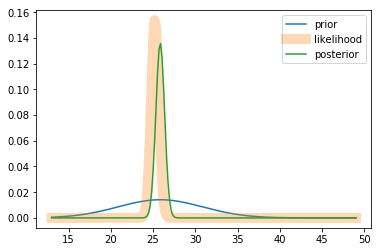

In [65]:
N = len(auto_data)
p = np.linspace(np.min(auto_data.loc[:,"city-mpg"]), np.max(auto_data.loc[:,"city-mpg"]), num=N)

std_mean = np.mean(auto_std.loc[:,"city-mpg"])
pp = ss.stats.norm.pdf(p, std_mean, scale=5)
pp = pp / pp.sum() # normalize



all_city_mpg = comp_like(p, auto_data.loc[:,"city-mpg"])
std_all_city = comp_like(p, auto_std.loc[:,"city-mpg"])

plt.plot(p, pp, label='prior')
plt.plot(p, all_city_mpg, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, std_all_city, label='posterior')
plt.legend()

## Comparison tests...

I will see if the population of standard versus turbo logged normed prices is different

K statistic

In [76]:
print("The KS test result and the p value are", 
      ss.stats.kstest(auto_std.loc[:,"log_std_price"], "norm"))

The KS test result and the p value are KstestResult(statistic=0.35489292631141534, pvalue=0.0)


## K-S statistic

Says we can reject the null hypothesis that the distributions differ only because of random fluctuations

## T- test of distributions

Let's see what the t-test shows

In [84]:
def t_test(a, b, alpha, alternative='two-sided'):
    import statsmodels.stats.weightstats as ws
    from statistics import mean
    diff = a.mean() - b.mean()

    res = ss.stats.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   


    
test = t_test(auto_std.loc[:,"log_std_price"], auto_turbo.loc[:,"log_turbo_price"], 0.05)
test





DegFreedom    67.122761
Difference    -0.150606
Statistic     -3.752098
PValue         0.000229
Low95CI       -0.217634
High95CI      -0.083579
dtype: float64

## T-test also says 

Reject the null hypothesis that both distributions differ only because of random fluctutations


## Let's do some Tukey's Honest Significance testing


Let's test the various combinations of turbo, standard, front wheel drive, rear wheel drive, 4 wheel drive


F statistic = 49.388099271943474
P-value = 9.78009955176084e-29


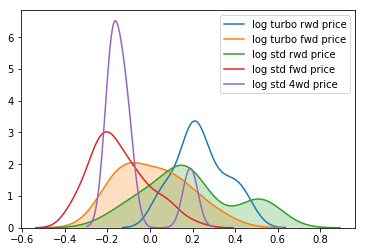

In [92]:
auto_data.loc[:,"rwd"] = auto_data.loc[:,"drive-wheels"].isin(['rwd']).astype(int)
auto_data.loc[:,"fwd"] = auto_data.loc[:,"drive-wheels"].isin(['fwd']).astype(int)
auto_data.loc[:,"fourwd"] = auto_data.loc[:,"drive-wheels"].isin(['4wd']).astype(int)
auto_rwd = auto_data.query('rwd == 1')
auto_rwd.columns = auto_rwd.columns.str.replace('price_norm','log rwd price')
auto_fwd = auto_data.query('fwd == 1')
auto_fwd.columns = auto_fwd.columns.str.replace('price_norm','log fwd price')
auto_4wd = auto_data.query('fourwd == 1')
auto_4wd.columns = auto_4wd.columns.str.replace('price_norm','log fourwd price')

auto_std_rwd = auto_data.query('std == 1')
auto_std_rwd = auto_std_rwd.query('rwd == 1')
##
auto_std_fwd = auto_data.query('std == 1')
auto_std_fwd = auto_std_fwd.query('fwd == 1')
##
auto_std_fourwd = auto_data.query('std == 1')
auto_std_fourwd = auto_std_fourwd.query('fourwd == 1')
##
auto_turbo_rwd = auto_data.query('turbo == 1')
auto_turbo_rwd = auto_turbo_rwd.query('rwd == 1')
##
auto_turbo_fwd = auto_data.query('turbo == 1')
auto_turbo_fwd = auto_turbo_fwd.query('fwd == 1')
##
auto_turbo_fourwd = auto_data.query('turbo == 1')
auto_turbo_fourwd = auto_turbo_fwd.query('fourwd == 1')
##
auto_std_rwd.columns = auto_std_rwd.columns.str.replace('price_norm','log std rwd price')
auto_std_fwd.columns = auto_std_fwd.columns.str.replace('price_norm','log std fwd price')
auto_std_fourwd.columns = auto_std_fourwd.columns.str.replace('price_norm','log std 4wd price')
## 

auto_turbo_fwd.columns = auto_turbo_fwd.columns.str.replace('price_norm','log turbo fwd price')
auto_turbo_rwd.columns = auto_turbo_rwd.columns.str.replace('price_norm','log turbo rwd price')
##auto_turbo_fourwd.columns = auto_turbo_fourwd.columns.str.replace('price','turbo 4wd price')
## There are no four wheel drive turbo vehicles. What an outrage!


sbn.kdeplot(auto_turbo_rwd.loc[:,"log turbo rwd price"] )
sbn.kdeplot(auto_turbo_fwd.loc[:,"log turbo fwd price"], shade = True )
##sbn.kdeplot(auto_turbo_fourwd.loc[:,"turbo 4wd price"], shade = True)
sbn.kdeplot( auto_std_rwd.loc[:,"log std rwd price"] , shade = True)
sbn.kdeplot( auto_std_fwd.loc[:,"log std fwd price"])
sbn.kdeplot(auto_std_fourwd.loc[:,"log std 4wd price"])


f_statistic, p_value = ss.stats.f_oneway(auto_std_rwd.loc[:,"log std rwd price"],
                                   auto_std_fwd.loc[:,"log std fwd price"],
                                   auto_std_fourwd.loc[:,"log std 4wd price"], 
                                   auto_turbo_fwd.loc[:,"log turbo fwd price"],
                                   auto_turbo_rwd.loc[:,"log turbo rwd price"])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))




## Reject the null hypothesis

We reject the hypothesis that the log of the normed price varies only randomly for aspiration and drive wheels

It's obvious from the plots that the distributions are different.

## Tukey's significance for body styles

Let's use Tukey's HSD test to see if the distributions of the log of the price varies only randomly.

In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

auto_data.loc[:,"convertible"] = auto_data.loc[:,"body-style"].isin(['convertible']).astype(int)
conv = auto_data.query('convertible == 1')
convy = conv.loc[:,"price_norm"]
auto_data.loc[:,"hatchback"] = auto_data.loc[:,"body-style"].isin(['hatchback']).astype(int)
hatch = auto_data.query('hatchback == 1')
hatchy = hatch.loc[:,"price_norm"]
auto_data.loc[:,"sedan"] = auto_data.loc[:,"body-style"].isin(['sedan']).astype(int)
sedan = auto_data.query('sedan == 1')
sedany = sedan.loc[:,"price_norm"]
auto_data.loc[:,"wagon"] = auto_data.loc[:,"body-style"].isin(['wagon']).astype(int)
wagon = auto_data.query('wagon == 1')
wagy = wagon.loc[:,"price_norm"]
auto_data.loc[:,"hardtop"] = auto_data.loc[:,"body-style"].isin(['hardtop']).astype(int)
hard = auto_data.query('hardtop == 1')
hardy = hard.loc[:,"price_norm"]

f_statistic, p_value = ss.stats.f_oneway(convy, hatchy, sedany, wagy, hardy)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

deal1 = pd.DataFrame()
one_data = np.zeros(shape=(len(convy),1)) + 1
deal1.loc[:,"val"] = convy
deal1.loc[:,"group_num"] = one_data.astype(int)
two_data = np.zeros(shape=(len(hatchy),1)) + 2
deal2 = pd.DataFrame()
deal2.loc[:,'val'] = hatchy
deal2.loc[:,"group_num"] = two_data.astype(int)
deal = pd.DataFrame()
deal = deal1
deal = deal.append(deal2)
three_data = np.zeros(shape=(len(sedany),1)) + 3
deal3 = pd.DataFrame()
deal3.loc[:,'val'] = sedany
deal3.loc[:,"group_num"] = three_data.astype(int)
deal = deal.append(deal3)
four_data = np.zeros(shape=(len(wagy),1)) + 4
deal4 = pd.DataFrame()
deal4.loc[:,'val'] = wagy
deal4.loc[:,"group_num"] = four_data.astype(int)
deal = deal.append(deal4)
five_data = np.zeros(shape=(len(hardy),1)) + 5
deal5 = pd.DataFrame()
deal5.loc[:,'val'] = hardy
deal5.loc[:,"group_num"] = five_data.astype(int)
deal = deal.append(deal5)

Tukey_HSD = pairwise_tukeyhsd(deal.val, deal.group_num)
print(Tukey_HSD)

F statistic = 8.369083699184879
P-value = 2.913987212650176e-06
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.3448  -0.5943 -0.0952  True 
  1      3    -0.2066  -0.4535  0.0403 False 
  1      4    -0.2474  -0.5141  0.0194 False 
  1      5    -0.0443  -0.3611  0.2726 False 
  2      3     0.1382   0.046   0.2304  True 
  2      4     0.0974  -0.0393  0.2341 False 
  2      5     0.3005   0.0815  0.5194  True 
  3      4    -0.0408  -0.1725  0.091  False 
  3      5     0.1623  -0.0536  0.3782 False 
  4      5     0.2031  -0.0352  0.4414 False 
---------------------------------------------


## Conclusion for body style

We can look at the table above say that the mean of the log of the price is significant for 

Convertibles(1) and Hatchbacks(2)
Hatchbacks(2) and Sedans(3)
Hatchbacks(2) and Hardtops(5)

<b>We reject the NULL hypothesis for the above 3 pairs.</b>

We cannot reject the NULL hypothesis for the other permutations of normed log price and body style.



## Bootstrap comparison of distributions

Let's look at the bootstrapped distribution of means on the normed log price of forward drive versus rear wheel drive cars

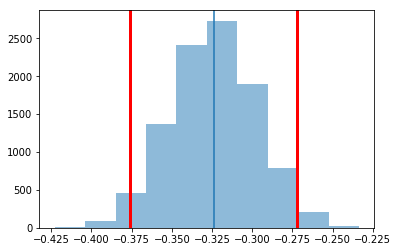

In [115]:
diffs = []

for i in range(n_replicas):
    sample = auto_data.sample(frac=1.0, replace=True)
    fwd_sample_mean = sample[sample.fwd == 1].price_norm.mean()
    rwd_sample_mean = sample[sample.rwd == 1].price_norm.mean()
    diffs.append(fwd_sample_mean - rwd_sample_mean)

diffs = pd.Series(diffs)

plot_hist(diffs)

## For the means

The difference is far from zero, so we can say using bootstrap methods that the differences in the means is significant between the log norm price of a front wheel drive car and a rear wheel drive car

## The standard deviations

Let's see if the standard deviations are significantly different.

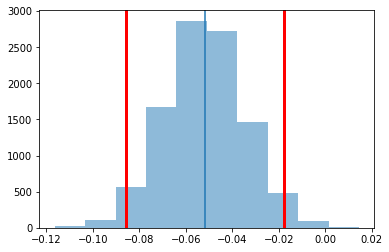

In [117]:
std_diffs = []

for i in range(n_replicas):
    sample = auto_data.sample(frac=1.0, replace=True)
    fwd_sample_std = sample[sample.fwd == 1].price_norm.std()
    rwd_sample_std = sample[sample.rwd == 1].price_norm.std()
    std_diffs.append(fwd_sample_std - rwd_sample_std)

std_diffs = pd.Series(std_diffs)

plot_hist(std_diffs)

## Standard deviations

The standard deviations are also different for the front wheel drive versus rear wheel drive

## Bootstrap for convertible versus hatchback



/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


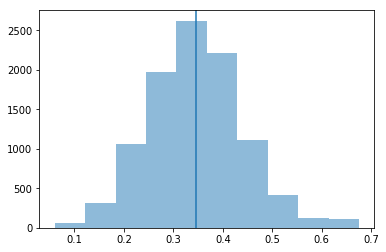

In [118]:

style_diffs = []

for i in range(n_replicas):
    sample = auto_data.sample(frac=1.0, replace=True)
    con_sample_mean = sample[sample.convertible == 1].price_norm.mean()
    hat_sample_mean = sample[sample.hatchback == 1].price_norm.mean()
    style_diffs.append(con_sample_mean - hat_sample_mean)

style_diffs = pd.Series(style_diffs)

plot_hist(style_diffs)

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


